In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("t-sne_LOFAR.csv")

In [3]:
# Changing order
order = ['u_flux_corr', 'R_flux_corr', 'I_flux_corr',
       'z_flux_corr', 'J_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr',
       'ch3_flux_corr', 'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100',
       'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'Total_flux', 'Peak_flux', 'x', 'y',
       'class', 'LERG', 'RQ', 'LERG_island', 'RQ_island', 'Not_RQ_island',
       'Not_LERG_island']

data = data[order]

In [4]:
"""
temp = ['u_flux_corr', 'R_flux_corr', 'I_flux_corr',
       'z_flux_corr', 'J_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr',
       'ch3_flux_corr', 'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100',
        'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'Total_flux', 'Peak_flux']
sm = data[temp].sum(axis=1)
for c in temp:
    data[c] /= sm
"""

"\ntemp = ['u_flux_corr', 'R_flux_corr', 'I_flux_corr',\n       'z_flux_corr', 'J_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr',\n       'ch3_flux_corr', 'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100',\n        'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'Total_flux', 'Peak_flux']\nsm = data[temp].sum(axis=1)\nfor c in temp:\n    data[c] /= sm\n"

# 1

In [5]:
LERGs = pd.DataFrame(columns=["Filter", "Flux", "LERG_island", "RQ_island"])
RQs = pd.DataFrame(columns=["Filter", "Flux", "LERG_island", "RQ_island"])

## LERGs

In [6]:
columns = ['u_flux_corr', 'R_flux_corr', 'I_flux_corr',
       'z_flux_corr', 'J_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr',
       'ch3_flux_corr', 'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100',
       'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'Total_flux', 'Peak_flux']
LERG = data[data['class']=='jet-mode radio AGN/low-excitation radio galaxy']
for c in columns:
    column = LERG[[c, "LERG_island", "RQ_island"]]
    column["Filter"] = c
    column = column.rename(columns={c: 'Flux'})
    LERGs = pd.concat([LERGs, column])

/var/lib/condor/execute/dir_1240377/ipykernel_1244544/1002420582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column["Filter"] = c


## RQ

In [7]:
columns = ['u_flux_corr', 'R_flux_corr', 'I_flux_corr',
       'z_flux_corr', 'J_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr',
       'ch3_flux_corr', 'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100',
       'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'Total_flux', 'Peak_flux']
RQ = data[data['class']=='radio-quiet AGN']
for c in columns:
    column = RQ[[c, "LERG_island", "RQ_island"]]
    column["Filter"] = c
    column = column.rename(columns={c: 'Flux'})
    RQs= pd.concat([RQs, column])

/var/lib/condor/execute/dir_1240377/ipykernel_1244544/3615411700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column["Filter"] = c


In [8]:
LERGs['Flux']

2          0.291751
3          0.398949
4          0.829543
14         0.829462
17         0.737137
           ...     
9399     293.150188
9401     483.523687
9404    3372.475334
9406     384.691808
9407     419.061185
Name: Flux, Length: 26078, dtype: float64

In [9]:
# Removing 0s, since logging them is hard
LERGs['Flux'][LERGs['Flux']==0] = np.nan
LERGs['Flux'] = np.log10(LERGs['Flux'])

RQs['Flux'][RQs['Flux']==0] = np.nan
RQs['Flux'] = np.log10(RQs['Flux'])

/var/lib/condor/execute/dir_1240377/ipykernel_1244544/3296325650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LERGs['Flux'][LERGs['Flux']==0] = np.nan
/var/lib/condor/execute/dir_1240377/ipykernel_1244544/3296325650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RQs['Flux'][RQs['Flux']==0] = np.nan


/var/lib/condor/execute/dir_1240377/ipykernel_1244544/1042969644.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels([-4, -2, 0, 2, 4, 6], fontsize=15)


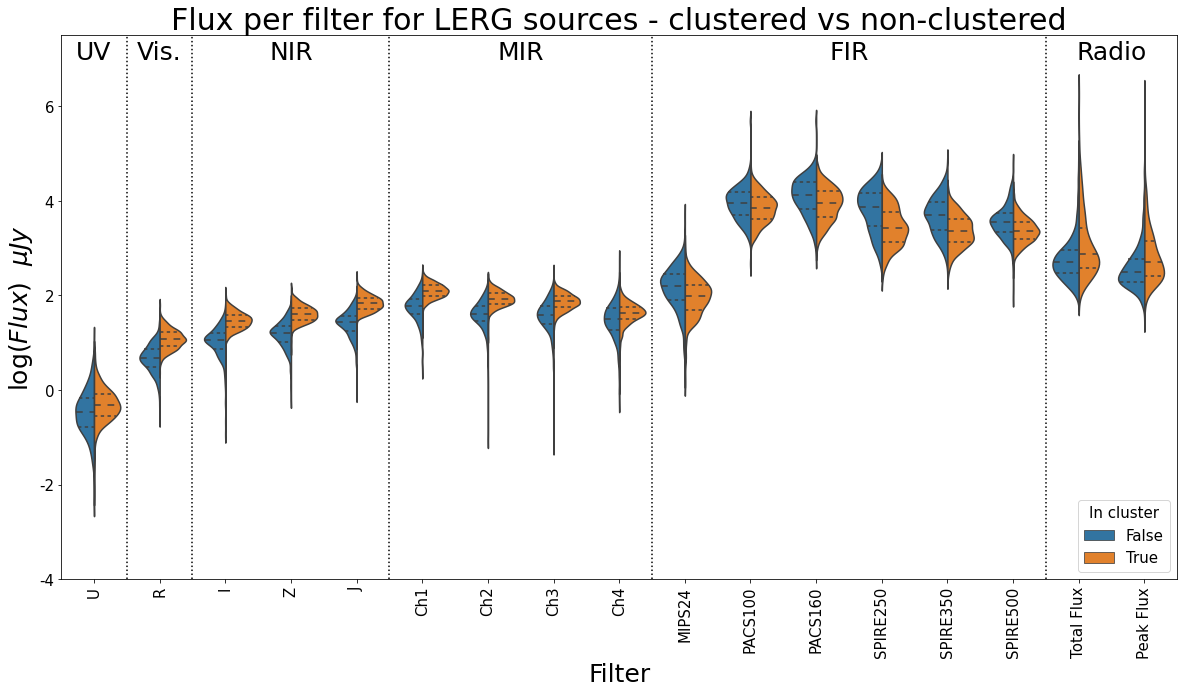

In [10]:
plt.figure(figsize=(20,10))
s = sns.violinplot(data=LERGs, x='Filter', y='Flux', hue='LERG_island', inner='quartile', split=True)
s.set_xticklabels(rotation=90, labels=columns)
s.set_xlabel('Filter', fontsize=25)
s.set_ylabel(r'$\log(Flux)$  $\mu Jy$', fontsize=25)
s.set_title("Flux per filter for LERG sources - clustered vs non-clustered", fontsize=30)

# Filling areas
s.set_ylim(-4,7.5)
s.set_xlim(-0.5,16.5)

# lines
s.axvline(0.5, c='black', linestyle='dotted')
s.axvline(1.5, c='black', linestyle='dotted')
s.axvline(4.5, c='black', linestyle='dotted')
s.axvline(8.5, c='black', linestyle='dotted')
s.axvline(14.5, c='black', linestyle='dotted')

# Adding names
s.text(0, 7, 'UV', horizontalalignment='center', fontsize=25)
s.text(1, 7, 'Vis.', horizontalalignment='center', fontsize=25)
s.text(3, 7, 'NIR', horizontalalignment='center', fontsize=25)
s.text(6.5, 7, 'MIR', horizontalalignment='center', fontsize=25)
s.text(11.5, 7, 'FIR', horizontalalignment='center', fontsize=25)
s.text(15.5, 7, 'Radio', horizontalalignment='center', fontsize=25)

# Legend settings
s.legend(loc=4, fontsize=15, title='In cluster', title_fontsize=15)

# Renaming x-labels
s.set_xticklabels(['U', 'R', 'I', 'Z', 'J', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'MIPS24', 'PACS100', 
              'PACS160', 'SPIRE250', 'SPIRE350', 'SPIRE500', 'Total Flux', 'Peak Flux'], fontsize=15)
s.set_yticklabels([-4, -2, 0, 2, 4, 6], fontsize=15)

s.get_figure().savefig('LERG_islands.pdf', bbox_inches='tight')

/var/lib/condor/execute/dir_1240377/ipykernel_1244544/1359617610.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels([-4, -2, 0, 2, 4, 6], fontsize=15)


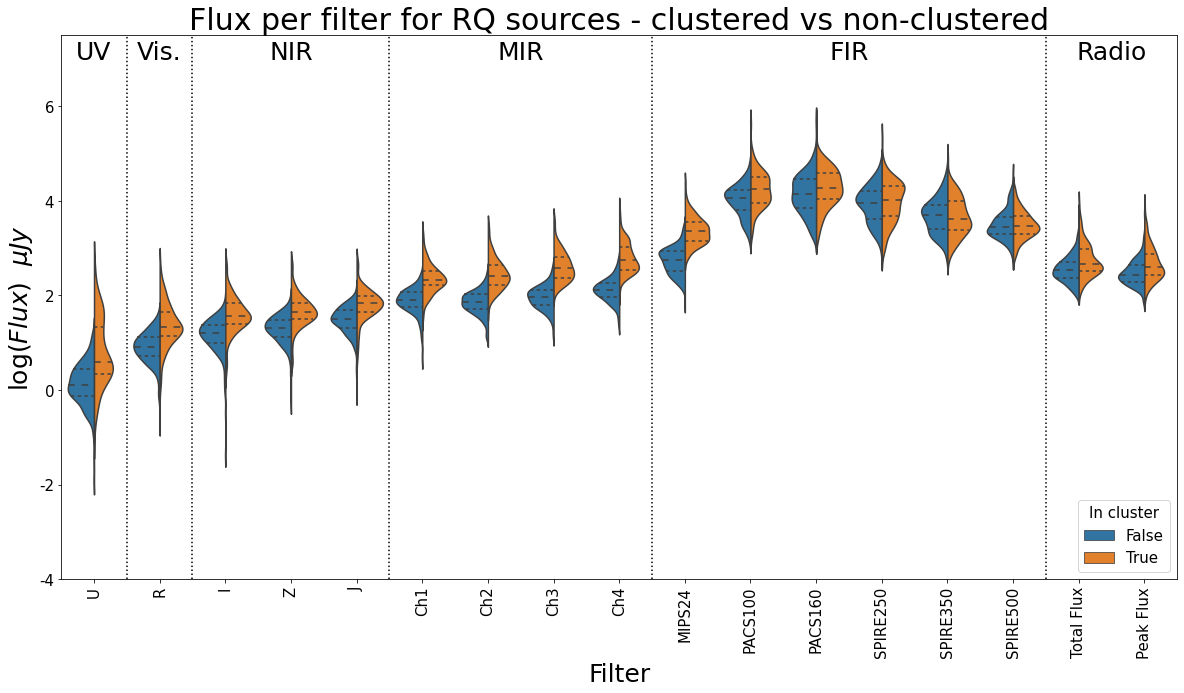

In [11]:
plt.figure(figsize=(20,10))
s = sns.violinplot(data=RQs, x='Filter', y='Flux', hue='RQ_island', inner='quartile', split=True)
s.set_xticklabels(rotation=90, labels=columns)
s.set_xlabel('Filter', fontsize=25)
s.set_ylabel(r'$\log(Flux)$  $\mu Jy$', fontsize=25)
s.set_title("Flux per filter for RQ sources - clustered vs non-clustered", fontsize=30)

# Filling areas
s.set_ylim(-4,7.5)
s.set_xlim(-0.5,16.5)

# lines
s.axvline(0.5, c='black', linestyle='dotted')
s.axvline(1.5, c='black', linestyle='dotted')
s.axvline(4.5, c='black', linestyle='dotted')
s.axvline(8.5, c='black', linestyle='dotted')
s.axvline(14.5, c='black', linestyle='dotted')

# Adding names
s.text(0, 7, 'UV', horizontalalignment='center', fontsize=25)
s.text(1, 7, 'Vis.', horizontalalignment='center', fontsize=25)
s.text(3, 7, 'NIR', horizontalalignment='center', fontsize=25)
s.text(6.5, 7, 'MIR', horizontalalignment='center', fontsize=25)
s.text(11.5, 7, 'FIR', horizontalalignment='center', fontsize=25)
s.text(15.5, 7, 'Radio', horizontalalignment='center', fontsize=25)

# Legend settings
s.legend(loc=4, fontsize=15, title='In cluster', title_fontsize=15)

# Renaming x-labels
s.set_xticklabels(['U', 'R', 'I', 'Z', 'J', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'MIPS24', 'PACS100', 
              'PACS160', 'SPIRE250', 'SPIRE350', 'SPIRE500', 'Total Flux', 'Peak Flux'], fontsize=15)
s.set_yticklabels([-4, -2, 0, 2, 4, 6], fontsize=15)

s.get_figure().savefig('RQ_islands.pdf', bbox_inches='tight')